# Import Data

In [222]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='AppleGothic')
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 
from collections import Counter

In [2]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [3]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
df.shape

(299, 13)

# Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### columns information
* **age ; 나이**
2. anaema ; 환자의 빈혈증 여부
3. creatinine_phosphokinase ; 크레아틴키나제 검사 결과
4. **diabetes ; 당뇨병 여부**
5. ejection_fraction ; 박출계수(%)<br> 의료업계에 종사하는 지인에 의하면, '심부전이 Ejection fraction이 떨어진 것이라 심부전의 선후관계엔 영향이 없을 것' 이라고 함.
6. **high_blood_pressure ; 고혈압 여부**
7. platelets ; 혈소판 수
8. serum_creatinine ; 혈중 크레아틴 레벨
9. serum_sodium ; 혈중 나트륨 레벨
10. **sex ; 성별 (남성 1)**
11. **smoking ; 흡연**
12. **time : 관찰 기간(day)**
13. DEATH_EVEN ; 사망 여부

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Variables

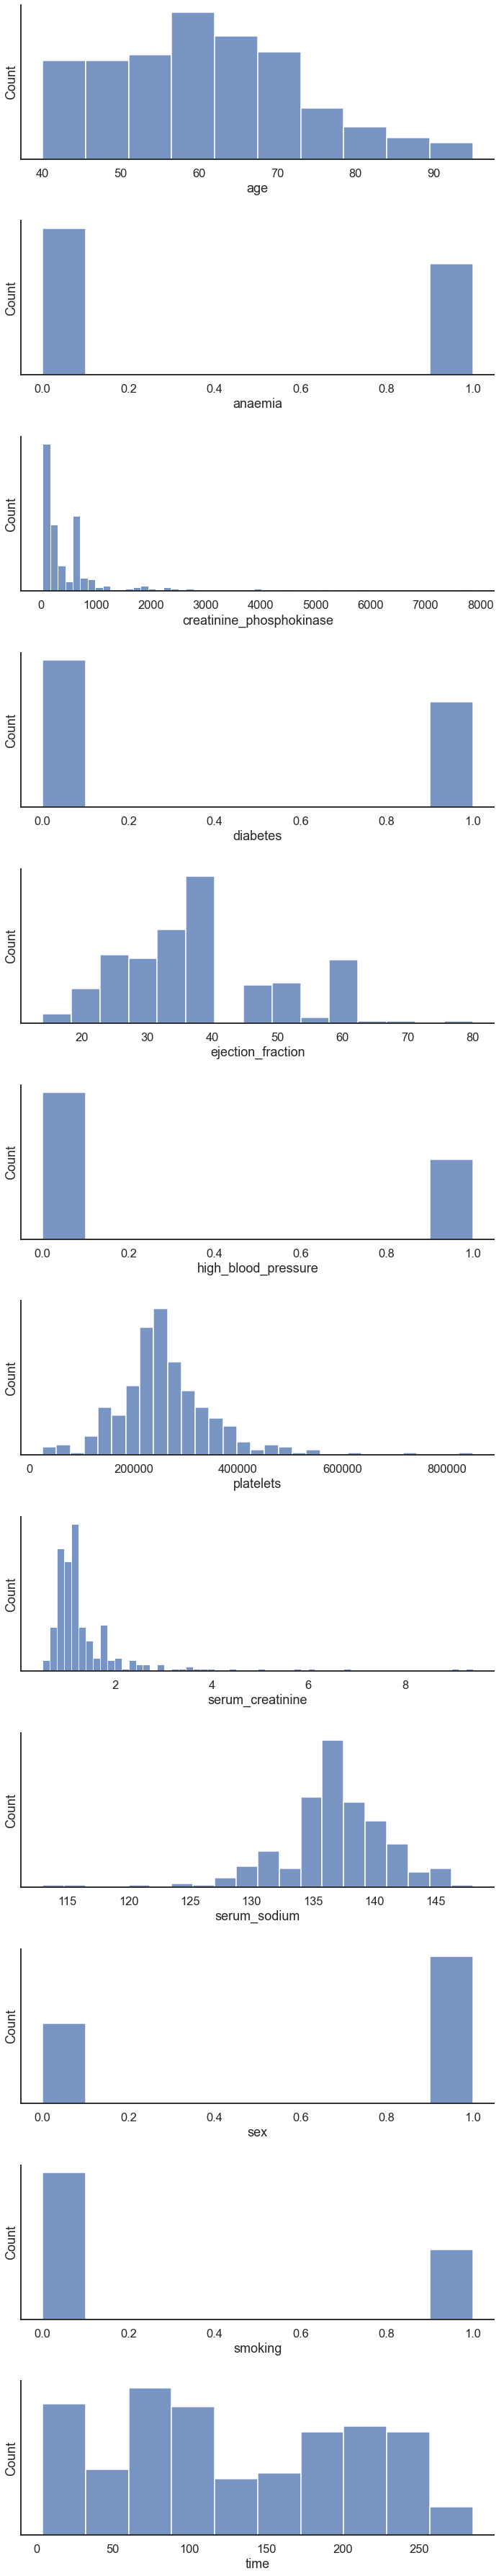

In [93]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12) = plt.subplots(12,1, figsize=(10,50))

for i in range(12):
    sns.histplot(x=df[df.columns[i]], palette="rocket", ax=f.axes[i])
#     f.axes[i].set_ylabel(df.columns[i])

sns.despine(bottom=False)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

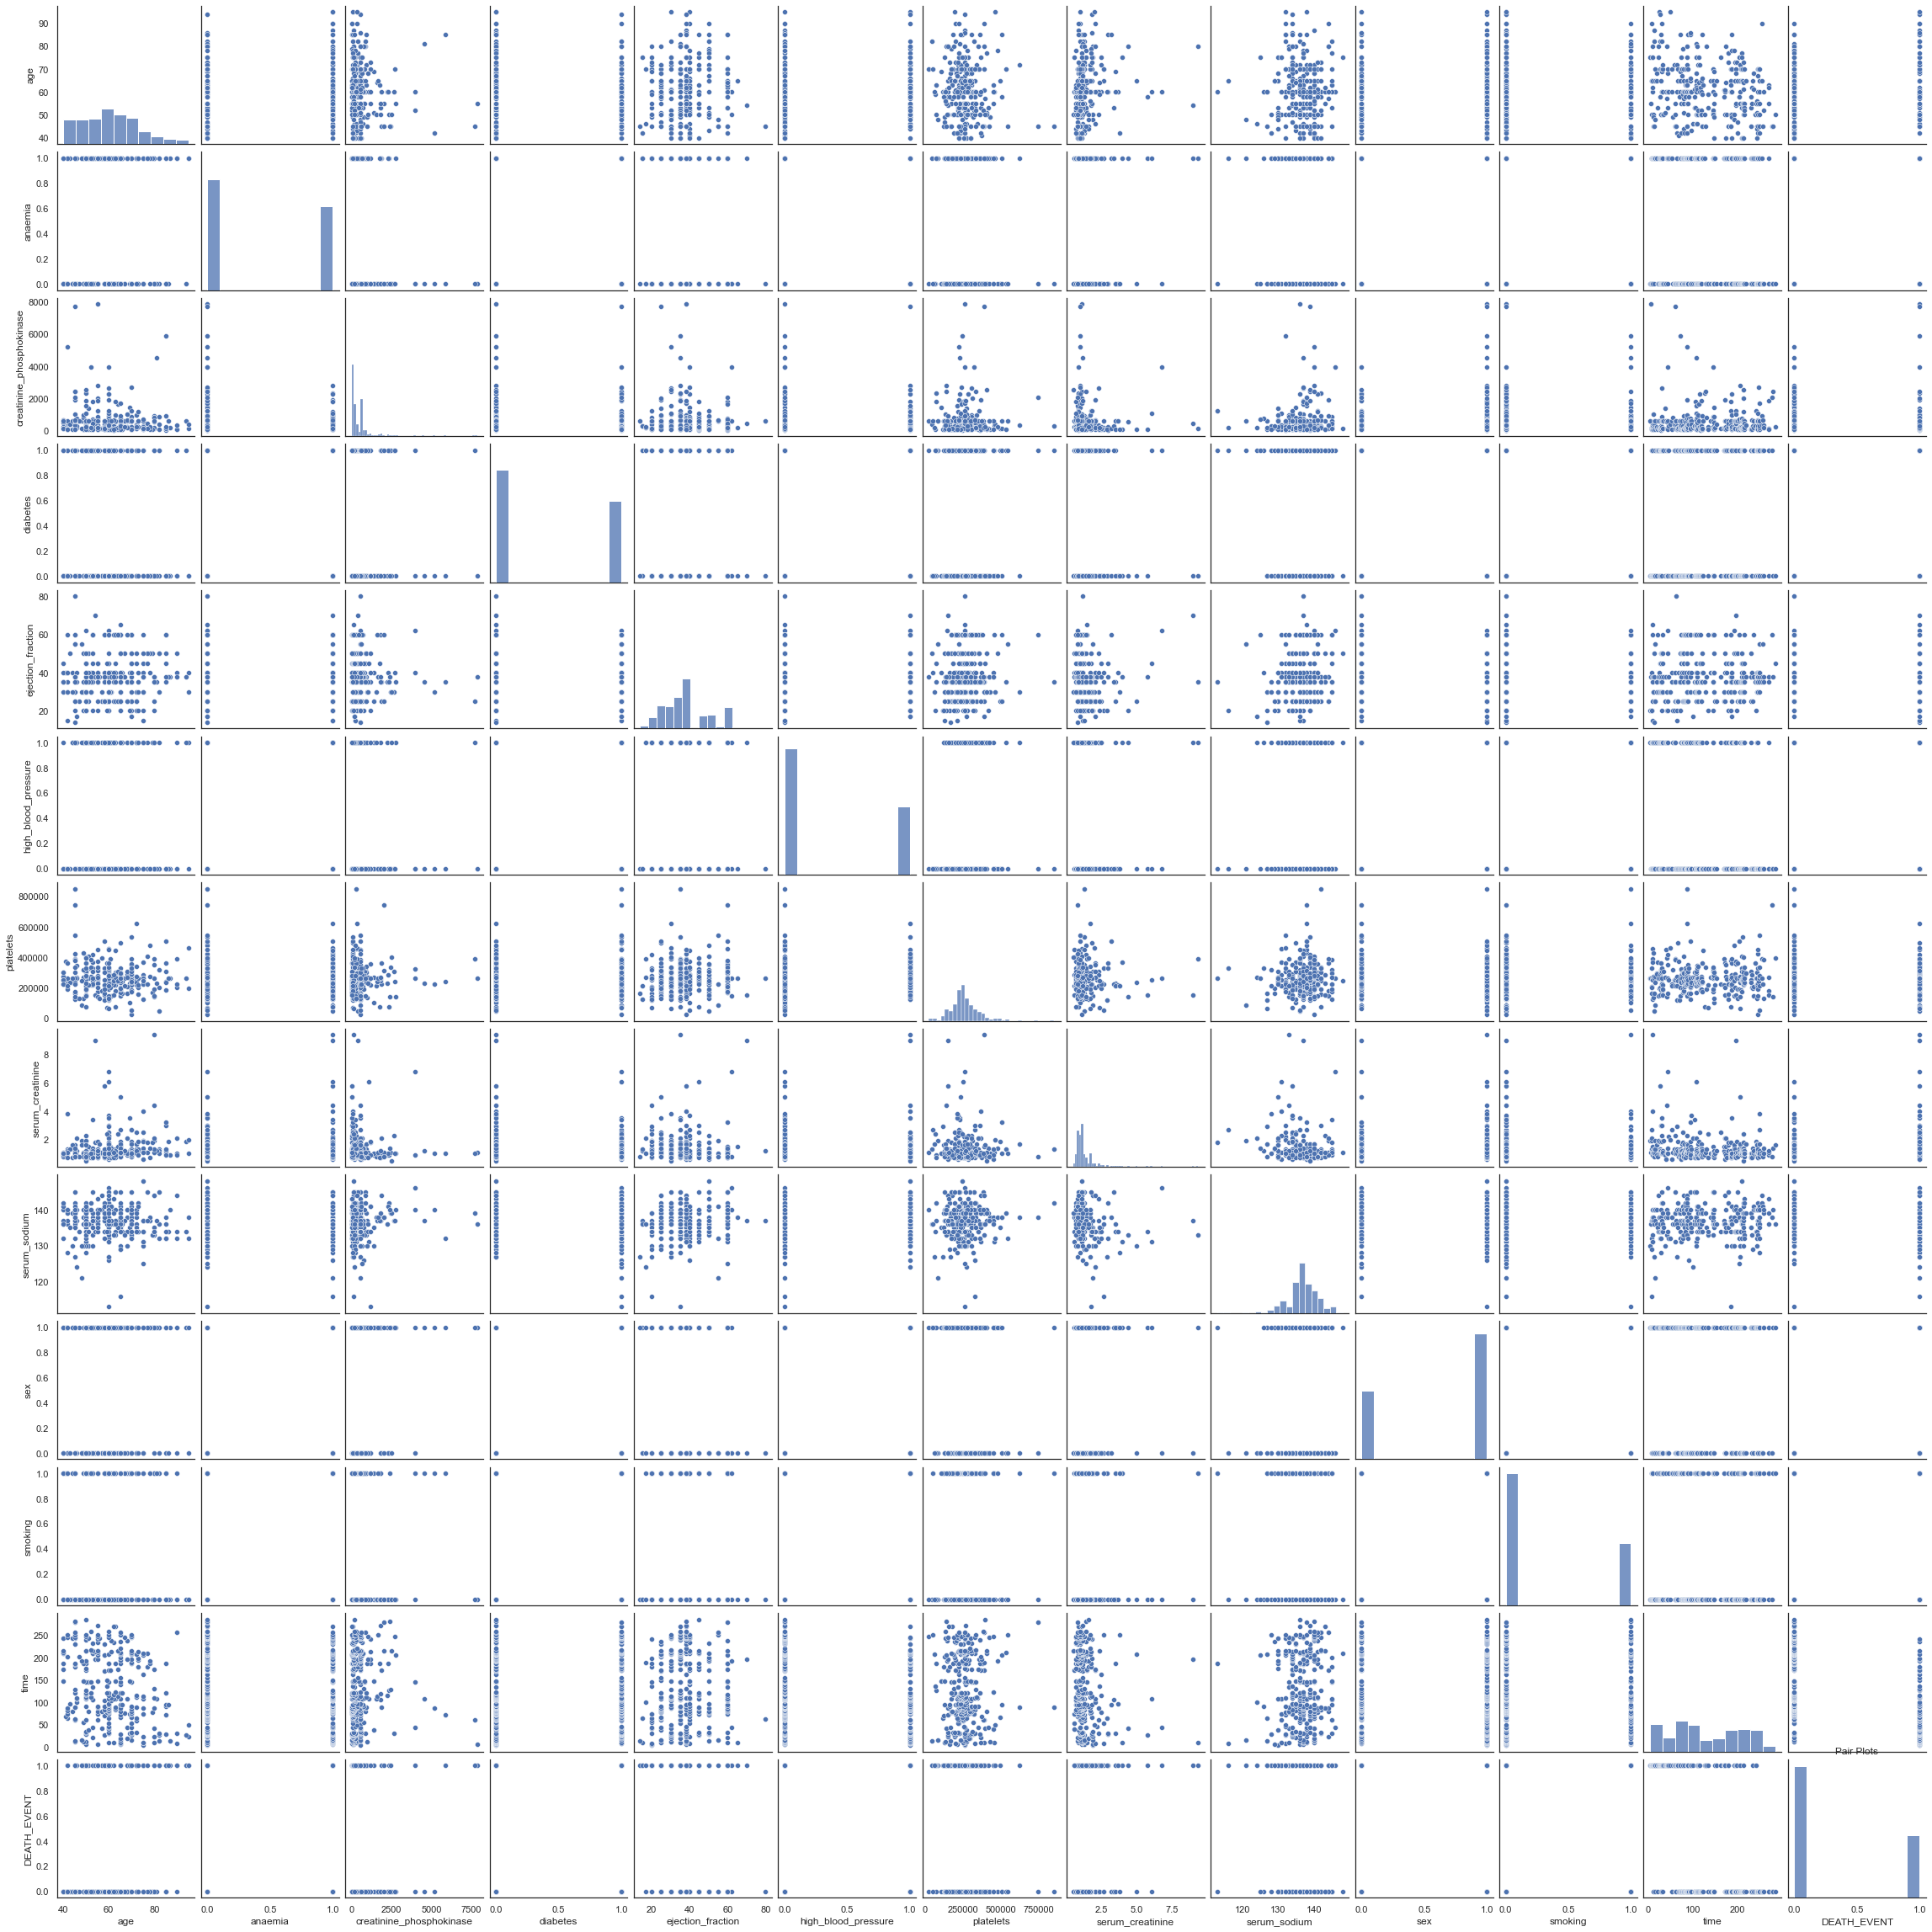

In [150]:
sns.pairplot(df)
plt.title("Pair Plots")
plt.show()

### 나이
- 사망한 사람의 평균 연령은 65세로, 사망하지 않은 사람의 평균 연령인 58세 보다 7세가 많다.
- age 와 DEATH_EVENT는 0.25의 피어슨 상관계수를 가진다.

<AxesSubplot:xlabel='age', ylabel='Count'>

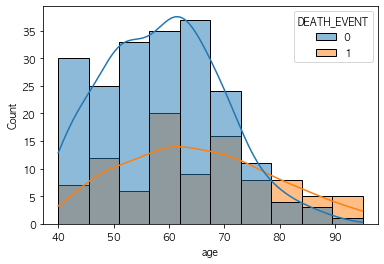

In [223]:
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

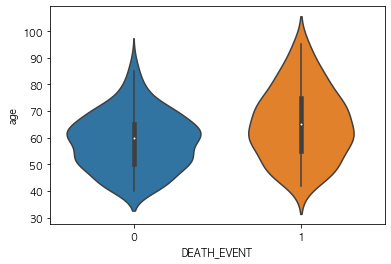

In [218]:
sns.violinplot(x='DEATH_EVENT', y='age', data=df)

In [247]:
x_age = pd.Series(data = df['age'])
y1 = pd.Series(data = df['DEATH_EVENT'])
np.corrcoef(x_age, y1)

array([[1.        , 0.25372854],
       [0.25372854, 1.        ]])

In [258]:
df_DEATH_EVENT_1 = df[df.DEATH_EVENT == 1]
df_DEATH_EVENT_0 = df[df.DEATH_EVENT == 0]

In [269]:
df_DEATH_EVENT_0['age'].describe()

count    203.000000
mean      58.761906
std       10.637890
min       40.000000
25%       50.000000
50%       60.000000
75%       65.000000
max       90.000000
Name: age, dtype: float64

In [270]:
df_DEATH_EVENT_1['age'].describe()

count    96.000000
mean     65.215281
std      13.214556
min      42.000000
25%      55.000000
50%      65.000000
75%      75.000000
max      95.000000
Name: age, dtype: float64

### anaemia
- 빈혈증이라는 뜻
- The normal range for hemoglobin is: For men, 13.5 to 17.5 grams per deciliter. For women, 12.0 to 15.5 grams per deciliter 
<br>(출처 : https://www.mayoclinic.org/tests-procedures/hemoglobin-test/about/pac-20385075)
- Often, iron deficiency is associated with normal or elevated platelet counts.<br>(출처 : https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3439835/)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='anaemia'>

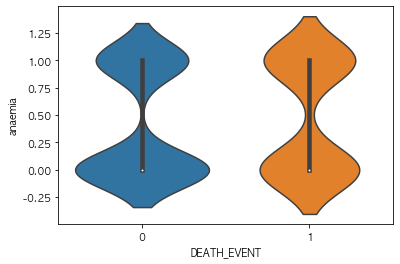

In [208]:
sns.violinplot(x='DEATH_EVENT', y='anaemia', data=df)

<AxesSubplot:xlabel='anaemia', ylabel='platelets'>

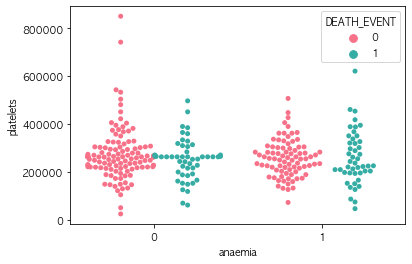

In [331]:
sns.swarmplot(x='anaemia', y='platelets', data=df, hue='DEATH_EVENT', palette='husl', dodge=True)

In [329]:
Counter(df_DEATH_EVENT_1['anaemia'])

Counter({0: 50, 1: 46})

In [339]:
x_ana = pd.Series(data = df_DEATH_EVENT_1['anaemia'])
y_pla = pd.Series(data = df_DEATH_EVENT_1['platelets'])
np.corrcoef(x=x_ana, y=y_pla)

array([[1.        , 0.03499067],
       [0.03499067, 1.        ]])

In [330]:
Counter(df_DEATH_EVENT_0['anaemia'])

Counter({0: 120, 1: 83})

In [306]:
x_ana = pd.Series(data = df_DEATH_EVENT_0['anaemia'])
y_pla = pd.Series(data = df_DEATH_EVENT_0['platelets'])
np.corrcoef(x=x_ana, y=y_pla)

array([[ 1.        , -0.07729446],
       [-0.07729446,  1.        ]])

### 성별
- 여성은 105명, 남성은 194명
- sex 와 DEATH_EVENT는 -0.004의 피어슨 상관계수를 가진다 (거의 관계 없음)

In [289]:
Counter(df['sex'])

Counter({0: 105, 1: 194})

In [290]:
x_age = pd.Series(data = df['sex'])
y1 = pd.Series(data = df['DEATH_EVENT'])
np.corrcoef(x_age, y1)

array([[ 1.        , -0.00431638],
       [-0.00431638,  1.        ]])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='sex'>

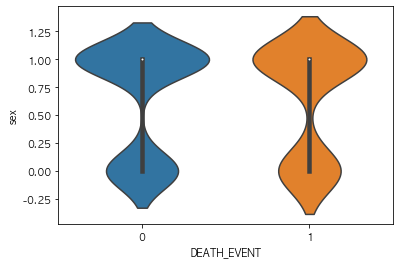

In [219]:
sns.violinplot(x='DEATH_EVENT', y='sex', data=df)

In [286]:
df_DEATH_EVENT_1[df_DEATH_EVENT_1['sex']==0].mean()

age                             62.176471
anaemia                          0.588235
creatinine_phosphokinase       507.676471
diabetes                         0.588235
ejection_fraction               37.529412
high_blood_pressure              0.500000
platelets                   259512.709412
serum_creatinine                 1.945882
serum_sodium                   135.470588
sex                              0.000000
smoking                          0.088235
time                            73.970588
DEATH_EVENT                      1.000000
dtype: float64

In [287]:
df_DEATH_EVENT_1[df_DEATH_EVENT_1['sex']==1].mean()

age                             66.881726
anaemia                          0.419355
creatinine_phosphokinase       759.322581
diabetes                         0.322581
ejection_fraction               31.241935
high_blood_pressure              0.354839
platelets                   254663.680323
serum_creatinine                 1.775484
serum_sodium                   135.322581
sex                              1.000000
smoking                          0.435484
time                            69.193548
DEATH_EVENT                      1.000000
dtype: float64

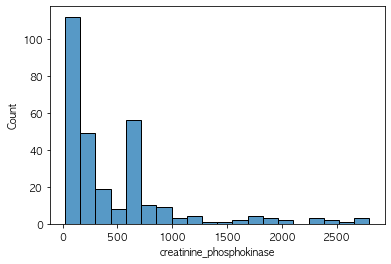

In [181]:
ax = sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

<AxesSubplot:xlabel='smoking', ylabel='creatinine_phosphokinase'>

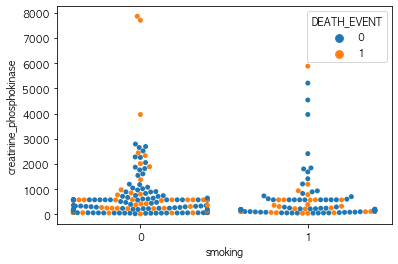

In [213]:
sns.swarmplot(x='smoking', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='diabetes'>

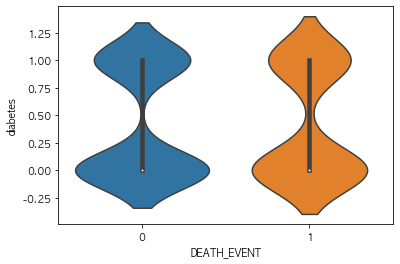

In [210]:
sns.violinplot(x='DEATH_EVENT', y='diabetes', data=df)

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

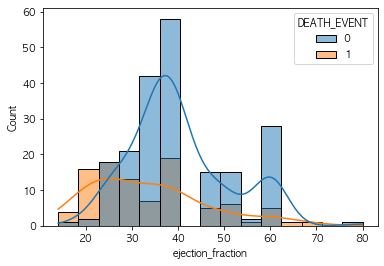

In [225]:
sns.histplot(x='ejection_fraction', data=df, bins=15, hue='DEATH_EVENT', kde=True)

In [237]:
df[df['ejection_fraction'] == 25].groupby(['DEATH_EVENT']).count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,18,18,18,18,18,18,18,18,18,18,18,18
1,18,18,18,18,18,18,18,18,18,18,18,18


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='high_blood_pressure'>

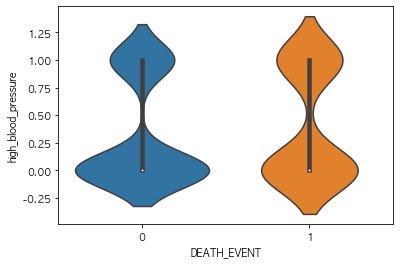

In [217]:
sns.violinplot(x='DEATH_EVENT', y='high_blood_pressure', data=df)

<AxesSubplot:xlabel='platelets', ylabel='Count'>

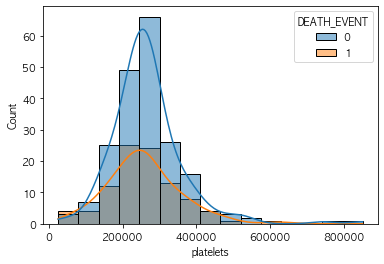

In [253]:
sns.histplot(x='platelets', data=df, bins=15, hue='DEATH_EVENT', kde=True)

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

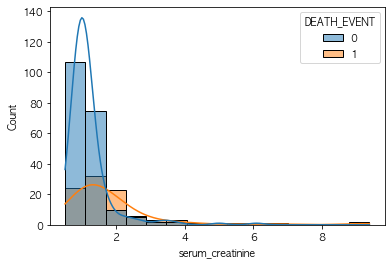

In [254]:
sns.histplot(x='serum_creatinine', data=df, bins=15, hue='DEATH_EVENT', kde=True)

<AxesSubplot:xlabel='serum_sodium', ylabel='Count'>

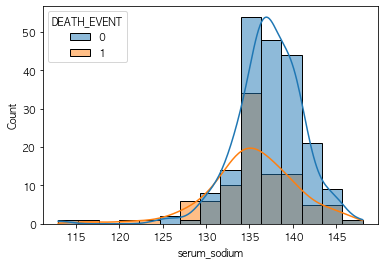

In [255]:
sns.histplot(x='serum_sodium', data=df, bins=15, hue='DEATH_EVENT', kde=True)

In [341]:
corr = df.corr(method='pearson')
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:>

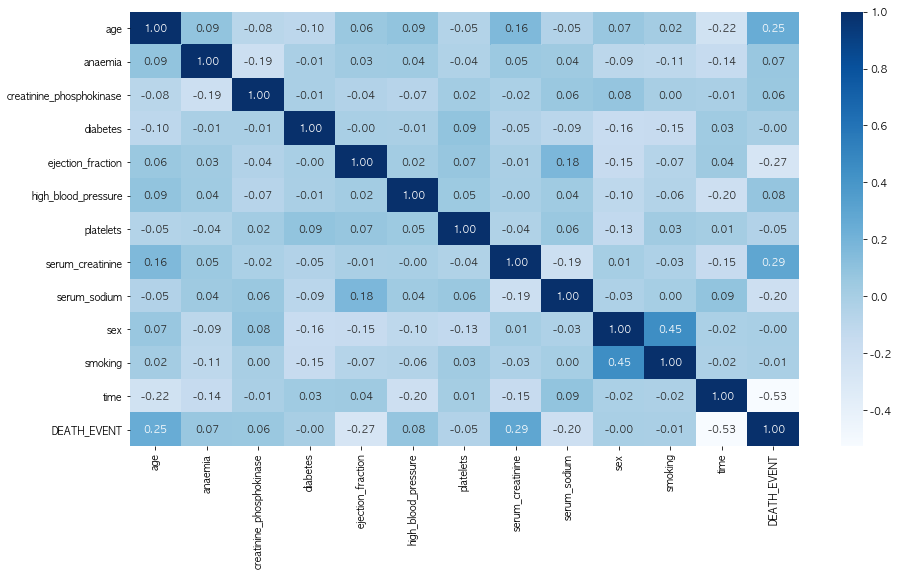

In [348]:
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')